# **ANALYSIS S3 - HSBG - EU**

## **DATA LOADING - From scraping file**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = "hsbg_scraper_leaderboard/battlegrounds.csv"

df = pd.read_csv(filepath_or_buffer=path, delimiter=",")
df.head()

,rank,accountid,rating
0,1,LOUDER,17527
1,2,huyagaoshou,17245
2,3,Sevel,16688
3,4,douyumxjf,16054
4,5,wtybill,16034


## **Data Modification - GroupBy on rating**

In [10]:
result = df.groupby("rating").size().reset_index(name="count")

In [11]:
def compute_rank_statistics(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calcule les statistiques descriptives sur la colonne 'rank'
    : moyenne, médiane, quartiles, min et max.
    """
    stats = df['rating'].describe(percentiles=[0.25, 0.5, 0.75])
    result = pd.DataFrame({
        "stat": ["mean", "min", "max", "Q1 (25%)", "median (50%)", "Q3 (75%)"],
        "value": [
            round(stats["mean"], 2),
            int(stats["min"]),
            int(stats["max"]),
            int(stats["25%"]),
            int(stats["50%"]),
            int(stats["75%"]),
        ]
    })
    return result

In [12]:
def create_rating_bins(df, bin_size=100):
    """
    Groupe les ratings par tranches (bins) de taille définie
    et ajoute une colonne percentile = proportion du bin
    """
    # Créer les bins
    max_rating = df['rating'].max()
    bins = range(0, max_rating + bin_size, bin_size)

    # Assigner chaque rating à sa tranche
    df['rating_bin'] = pd.cut(
        df['rating'],
        bins=bins,
        right=False,
        labels=[f"{i}-{i + bin_size - 1}" for i in bins[:-1]]
    )

    # Grouper par bin et compter
    result = df.groupby('rating_bin', observed=False).size().reset_index(name='count')

    # Ajouter la colonne percentile
    total = result['count'].sum()
    result['percentile'] = (result['count'] / total * 100).round(2)

    return result

In [13]:
def plot_rating_distribution(df):
    """
    Crée des visualisations pour comprendre la distribution des ratings :
    - Histogramme
    - Courbe cumulative
    """
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Histogramme
    axes[0].hist(df['rating'], bins=50, edgecolor='black', alpha=0.7)
    axes[0].set_title('Distribution des ratings')
    axes[0].set_xlabel('Rating')
    axes[0].set_ylabel('Fréquence')

    # Courbe cumulative
    sorted_ratings = np.sort(df['rating'])
    y = np.arange(1, len(sorted_ratings) + 1) / len(sorted_ratings)
    axes[1].plot(sorted_ratings, y)
    axes[1].set_title('Distribution cumulative')
    axes[1].set_xlabel('Rating')
    axes[1].set_ylabel('Proportion cumulative')

    plt.tight_layout()
    plt.show()

In [14]:
summary = compute_rank_statistics(df)
summary.head(10)

,stat,value
0,mean,3905.01
1,min,1.00
2,max,17527.00
3,Q1 (25%),1882.00
4,median (50%),4199.00
5,Q3 (75%),6000.00


In [15]:
bins_1000 = create_rating_bins(df.copy(), bin_size=1000)
bins_1000.head(20)

,rating_bin,count,percentile
0,0-999,217539,17.18
1,1000-1999,109958,8.69
2,2000-2999,117708,9.30
3,3000-3999,142383,11.25
4,4000-4999,175518,13.86
5,5000-5999,176877,13.97
6,6000-6999,258787,20.44
7,7000-7999,54544,4.31
8,8000-8999,9741,0.77
9,9000-9999,1860,0.15


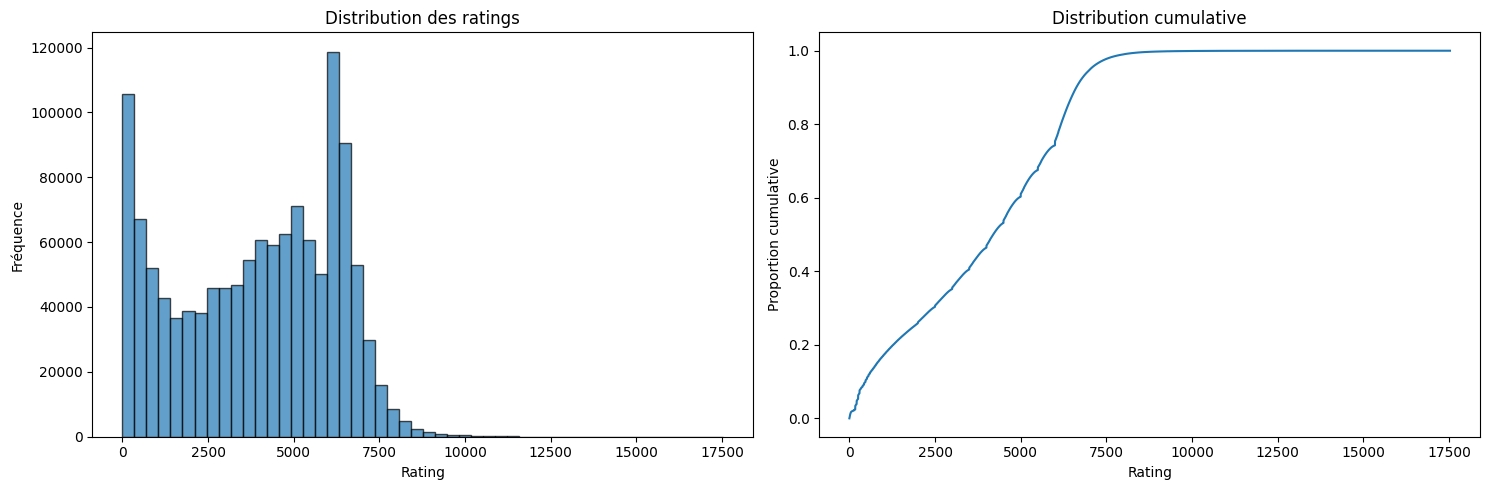

In [16]:
plot_rating_distribution(df)